In [1]:
# for some basins, zbedrock is not calibrated but its default values are very large
# this script tests reducing those parameter values and see the validation performance

In [7]:
import pandas as pd
import numpy as np
import os, sys, glob
import xarray as xr
import matplotlib.pyplot as plt

# Find basins that do not calib zbedrock but has large default values

In [5]:
file = '/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info.csv'
df_info = pd.read_csv(file)

In [19]:
# find basins to change
files = glob.glob('/glade/work/guoqiang/CTSM_CAMELS/data_paramcailb/ParamCalib_basinparam_*.csv')

zflag = np.zeros(len(df_info))
zz = np.nan * np.zeros(len(df_info))
for f in files:
    hruid = int(f.split('basinparam_')[1].split('.csv')[0])
    b = np.where(df_info['hru_id'].values == hruid)[0][0]
    df=pd.read_csv(f)
    if 'zbedrock' in df['Parameter'].values:
        zflag[b] = 1
        zz[b] = df[df['Parameter']=='zbedrock']['Default'].values[0]
    else:
        zflag[b] = 0

zflag = np.array(zflag)
print('Basins not calibrating zbedrock', np.sum(zflag==0))

Basins not calibrating zbedrock 451


len 56
index [ 30  40  41  42  43  44  45  94 107 129 134 135 136 137 138 139 140 141
 142 143 144 145 147 148 149 207 208 218 243 244 255 258 259 260 261 270
 271 272 273 274 275 277 279 281 335 336 338 403 404 405 406 412 414 426
 428 434]


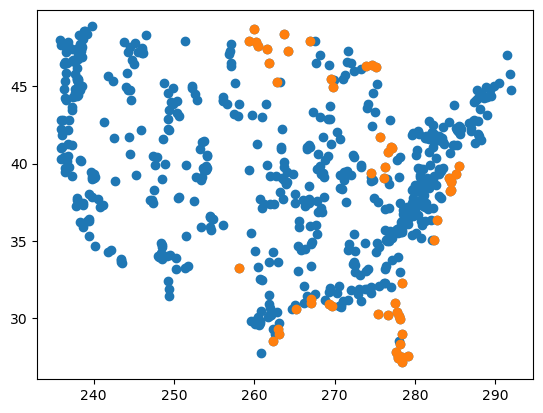

In [34]:
# find basins that have large default zbedrock values
file = '/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/sfcdata/surfdata_CAMELSandTDX_areabias_fix.simp0.001.level1_hist_78pfts_CMIP6_simyr2000_HAND_4_col_hillslope_geo_params_nlcd_bedrock.nc'
ds = xr.open_dataset(file)
defa_zbedrock = ds.zbedrock.values

sel_index = np.where( (defa_zbedrock>40) & (zflag==0) )[0]
print('len', len(sel_index))
print('index', sel_index)

lat = ds.LATIXY.values
lon = ds.LONGXY.values
plt.scatter(lon, lat)
plt.scatter(lon[sel_index], lat[sel_index])
